In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from tensorflow.examples.tutorials import mnist
mnist = mnist.input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
mnist.train.images.shape

(55000, 784)

In [11]:
sample_image = mnist.train.images[0].reshape(28, 28)

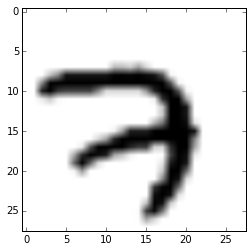

In [15]:
plt.imshow(sample_image).set_cmap('Greys')

In [17]:
mnist.train.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [18]:
import tensorflow as tf

In [21]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W)+ b)
y

<tf.Tensor 'Softmax_1:0' shape=(?, 10) dtype=float32>

In [22]:
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = - tf.reduce_sum(y_* tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
train_step

In [23]:
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [25]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [27]:
correct_prediction = tf.equal(tf.arg_max(y, 1), tf.arg_max(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
print sess.run(accuracy, feed_dict={x: mnist.test.images, y_:mnist.test.labels})

0.9009
